### **MODELS IMPLEMENTED**

### **5.** **DECISION TREE**

The Decision Tree Classifier is a supervised learning algorithm commonly used for classification tasks. It operates by learning simple decision rules inferred from the input features to split the dataset into subsets based on feature values. The final model resembles a tree structure, where each internal node denotes a test on a feature, each branch represents the outcome of the test, and each leaf node corresponds to a class label.

This section demonstrates the implementation of a Decision Tree Classifier using scikit-learn, including training, prediction, and performance evaluation.

In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = '/content/bank_cleaned_data.csv'
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     45211 non-null  object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


(None,
    age           job  marital  education default  balance housing loan  \
 0   58    management  married   tertiary      no     2143     yes   no   
 1   44    technician   single  secondary      no       29     yes   no   
 2   33  entrepreneur  married  secondary      no        2     yes  yes   
 3   47   blue-collar  married  secondary      no     1506     yes   no   
 4   33   blue-collar   single  secondary      no        1      no   no   
 
    contact  day_of_week month  duration  campaign  pdays  previous poutcome  \
 0  Unknown            5   may       261         1     -1         0  Unknown   
 1  Unknown            5   may       151         1     -1         0  Unknown   
 2  Unknown            5   may        76         1     -1         0  Unknown   
 3  Unknown            5   may        92         1     -1         0  Unknown   
 4  Unknown            5   may       198         1     -1         0  Unknown   
 
     y  
 0  no  
 1  no  
 2  no  
 3  no  
 4  no  )

### DATA PREPARATION

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = df.drop(columns=['duration'])

# Encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split into features and target
X = df.drop('y', axis=1)

y = df['y']

# Split into training and testing sets (disjoint subsets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Save full processed dataset
df.to_csv('/content/prepared_data_dt.csv', index=False)

# Save training and testing sets separately
X_train.to_csv('/content/X_train_dt.csv', index=False)
X_test.to_csv('/content/X_test_dt.csv', index=False)
y_train.to_csv('/content/y_train_dt.csv', index=False)
y_test.to_csv('/content/y_test_dt.csv', index=False)

# Display confirmation and shapes
print("Prepared dataset saved as 'bank_prepared_data.csv'")
print("Training and Testing sets saved as 'X_train.csv', 'X_test.csv', 'y_train.csv', 'y_test.csv'")
print(f"Training Set Shape: X={X_train.shape}, y={y_train.shape}")
print(f"Testing Set Shape: X={X_test.shape}, y={y_test.shape}")

Prepared dataset saved as 'bank_prepared_data.csv'
Training and Testing sets saved as 'X_train.csv', 'X_test.csv', 'y_train.csv', 'y_test.csv'
Training Set Shape: X=(36168, 15), y=(36168,)
Testing Set Shape: X=(9043, 15), y=(9043,)


In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Train Decision Trees
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X_train, y_train)

dt2 = DecisionTreeClassifier(max_features="sqrt", random_state=42)
dt2.fit(X_train, y_train)

dt3 = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
dt3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

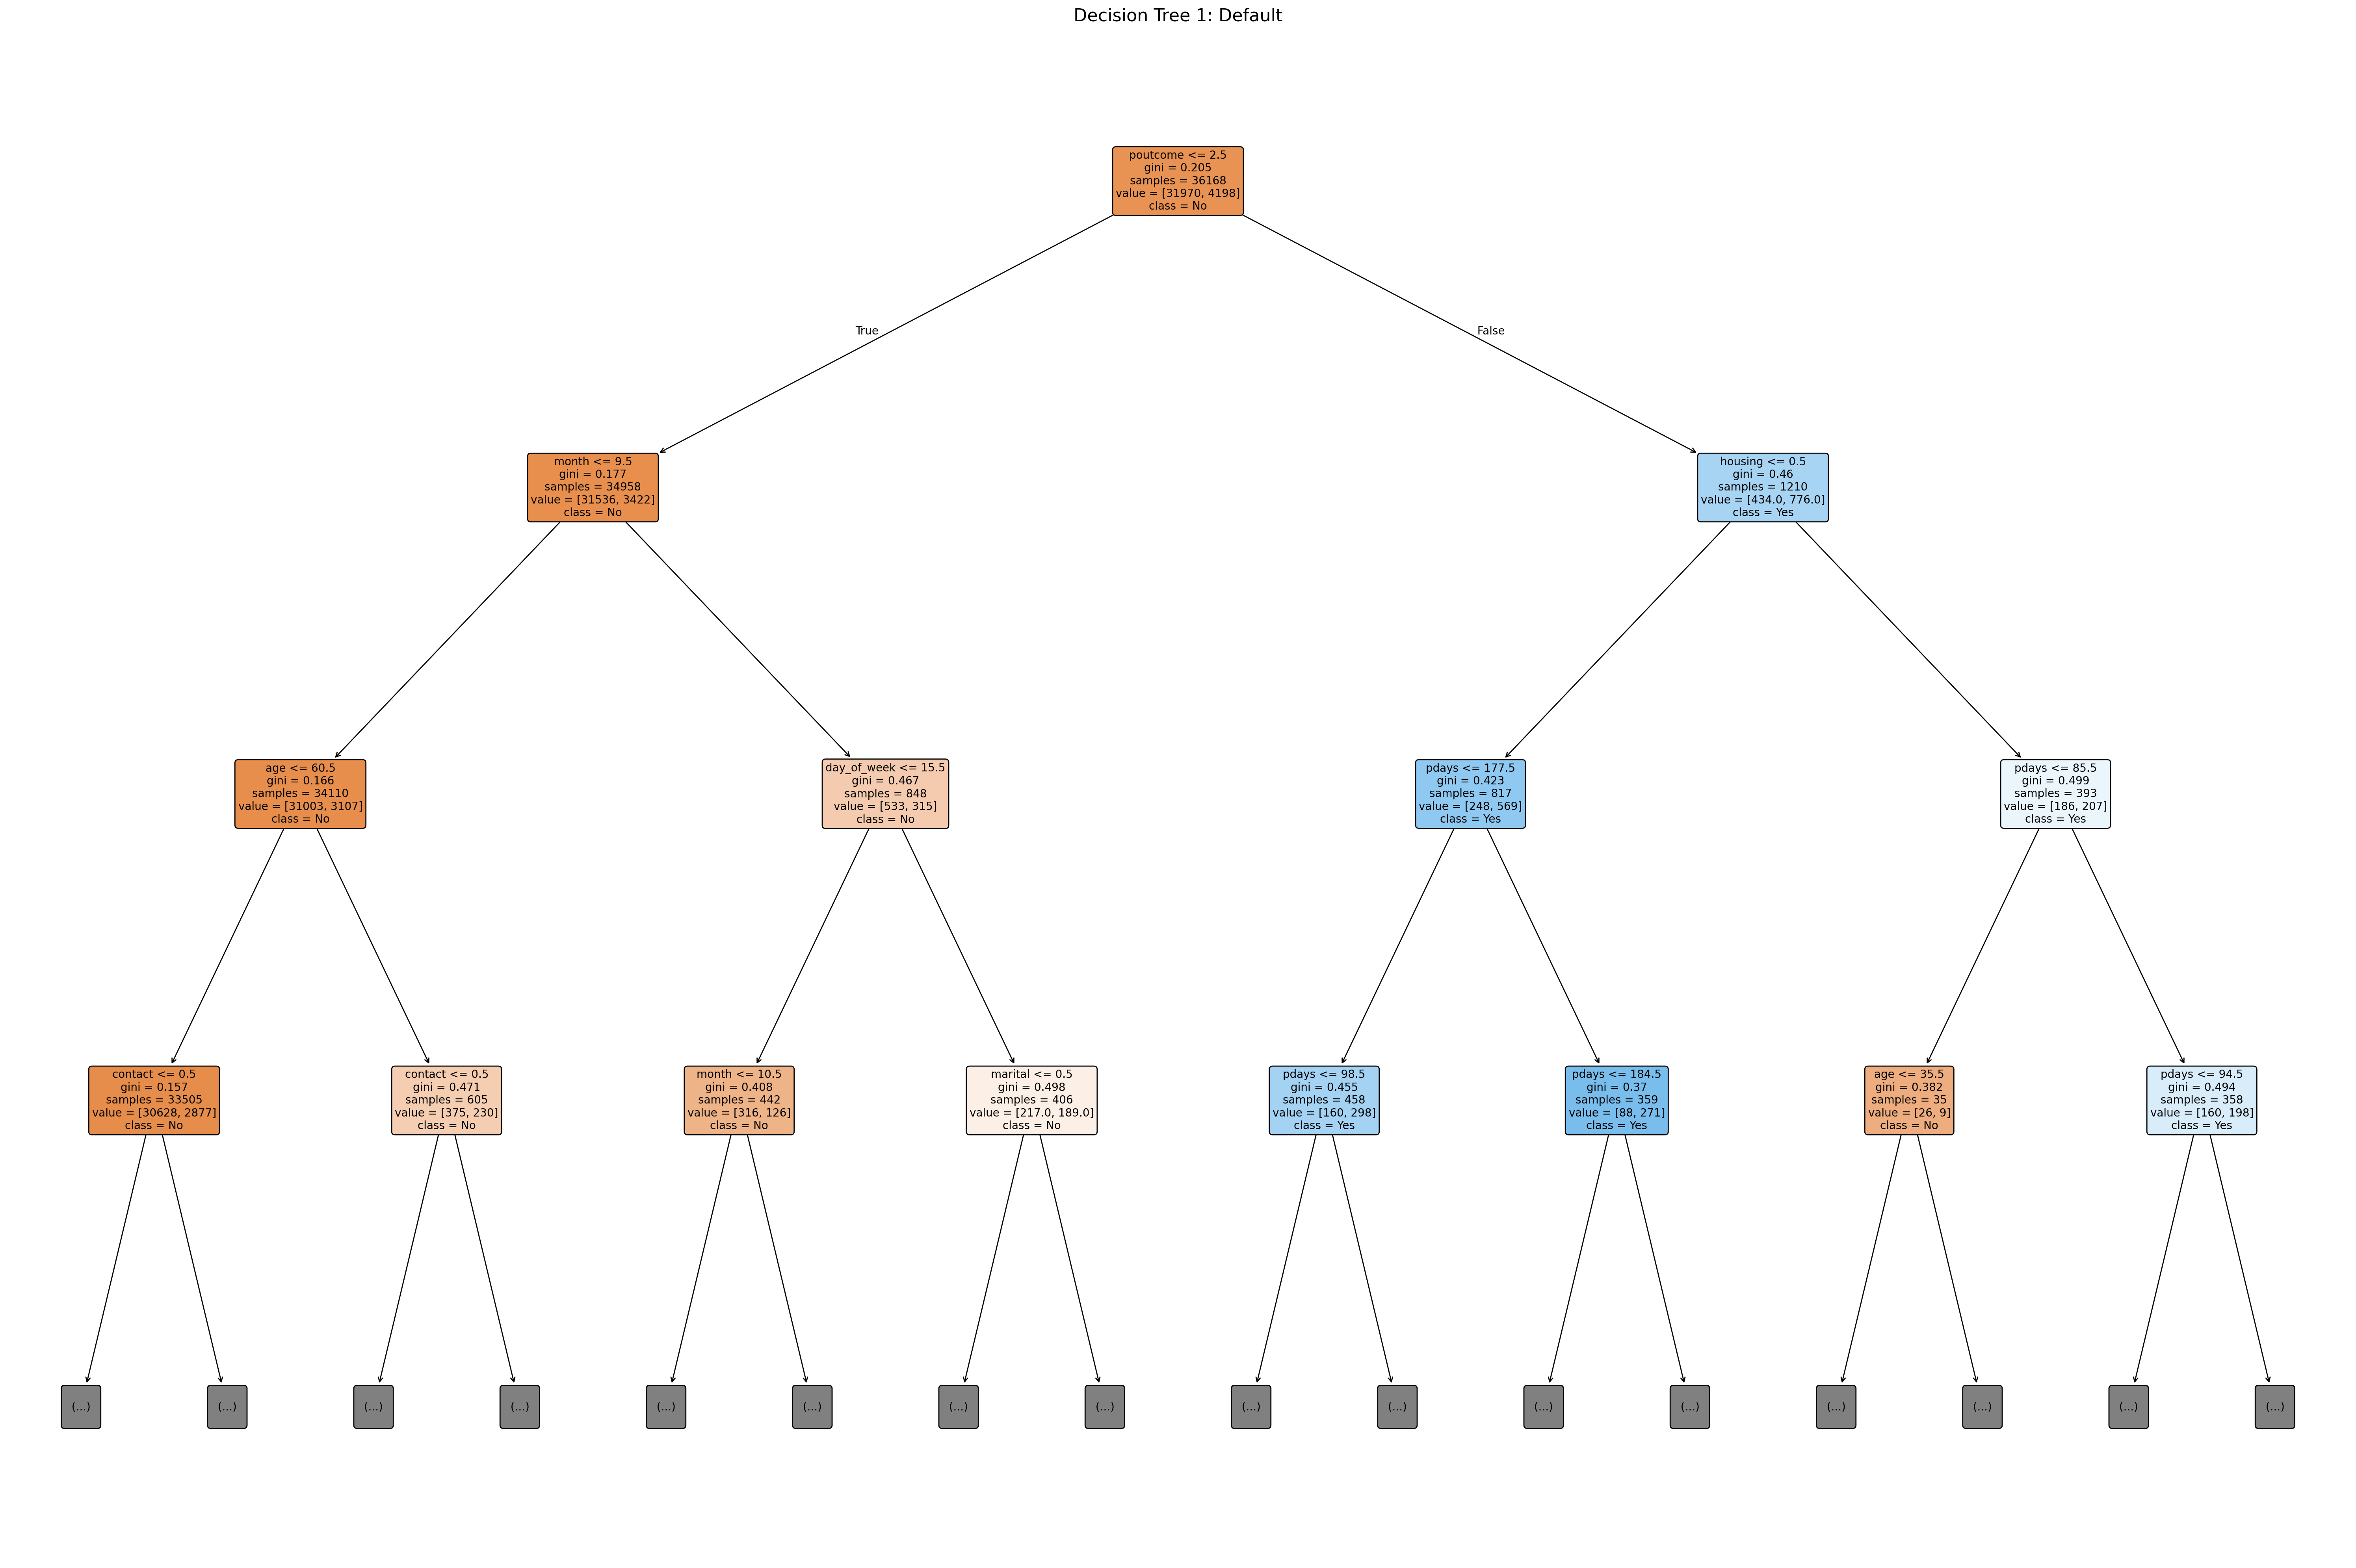

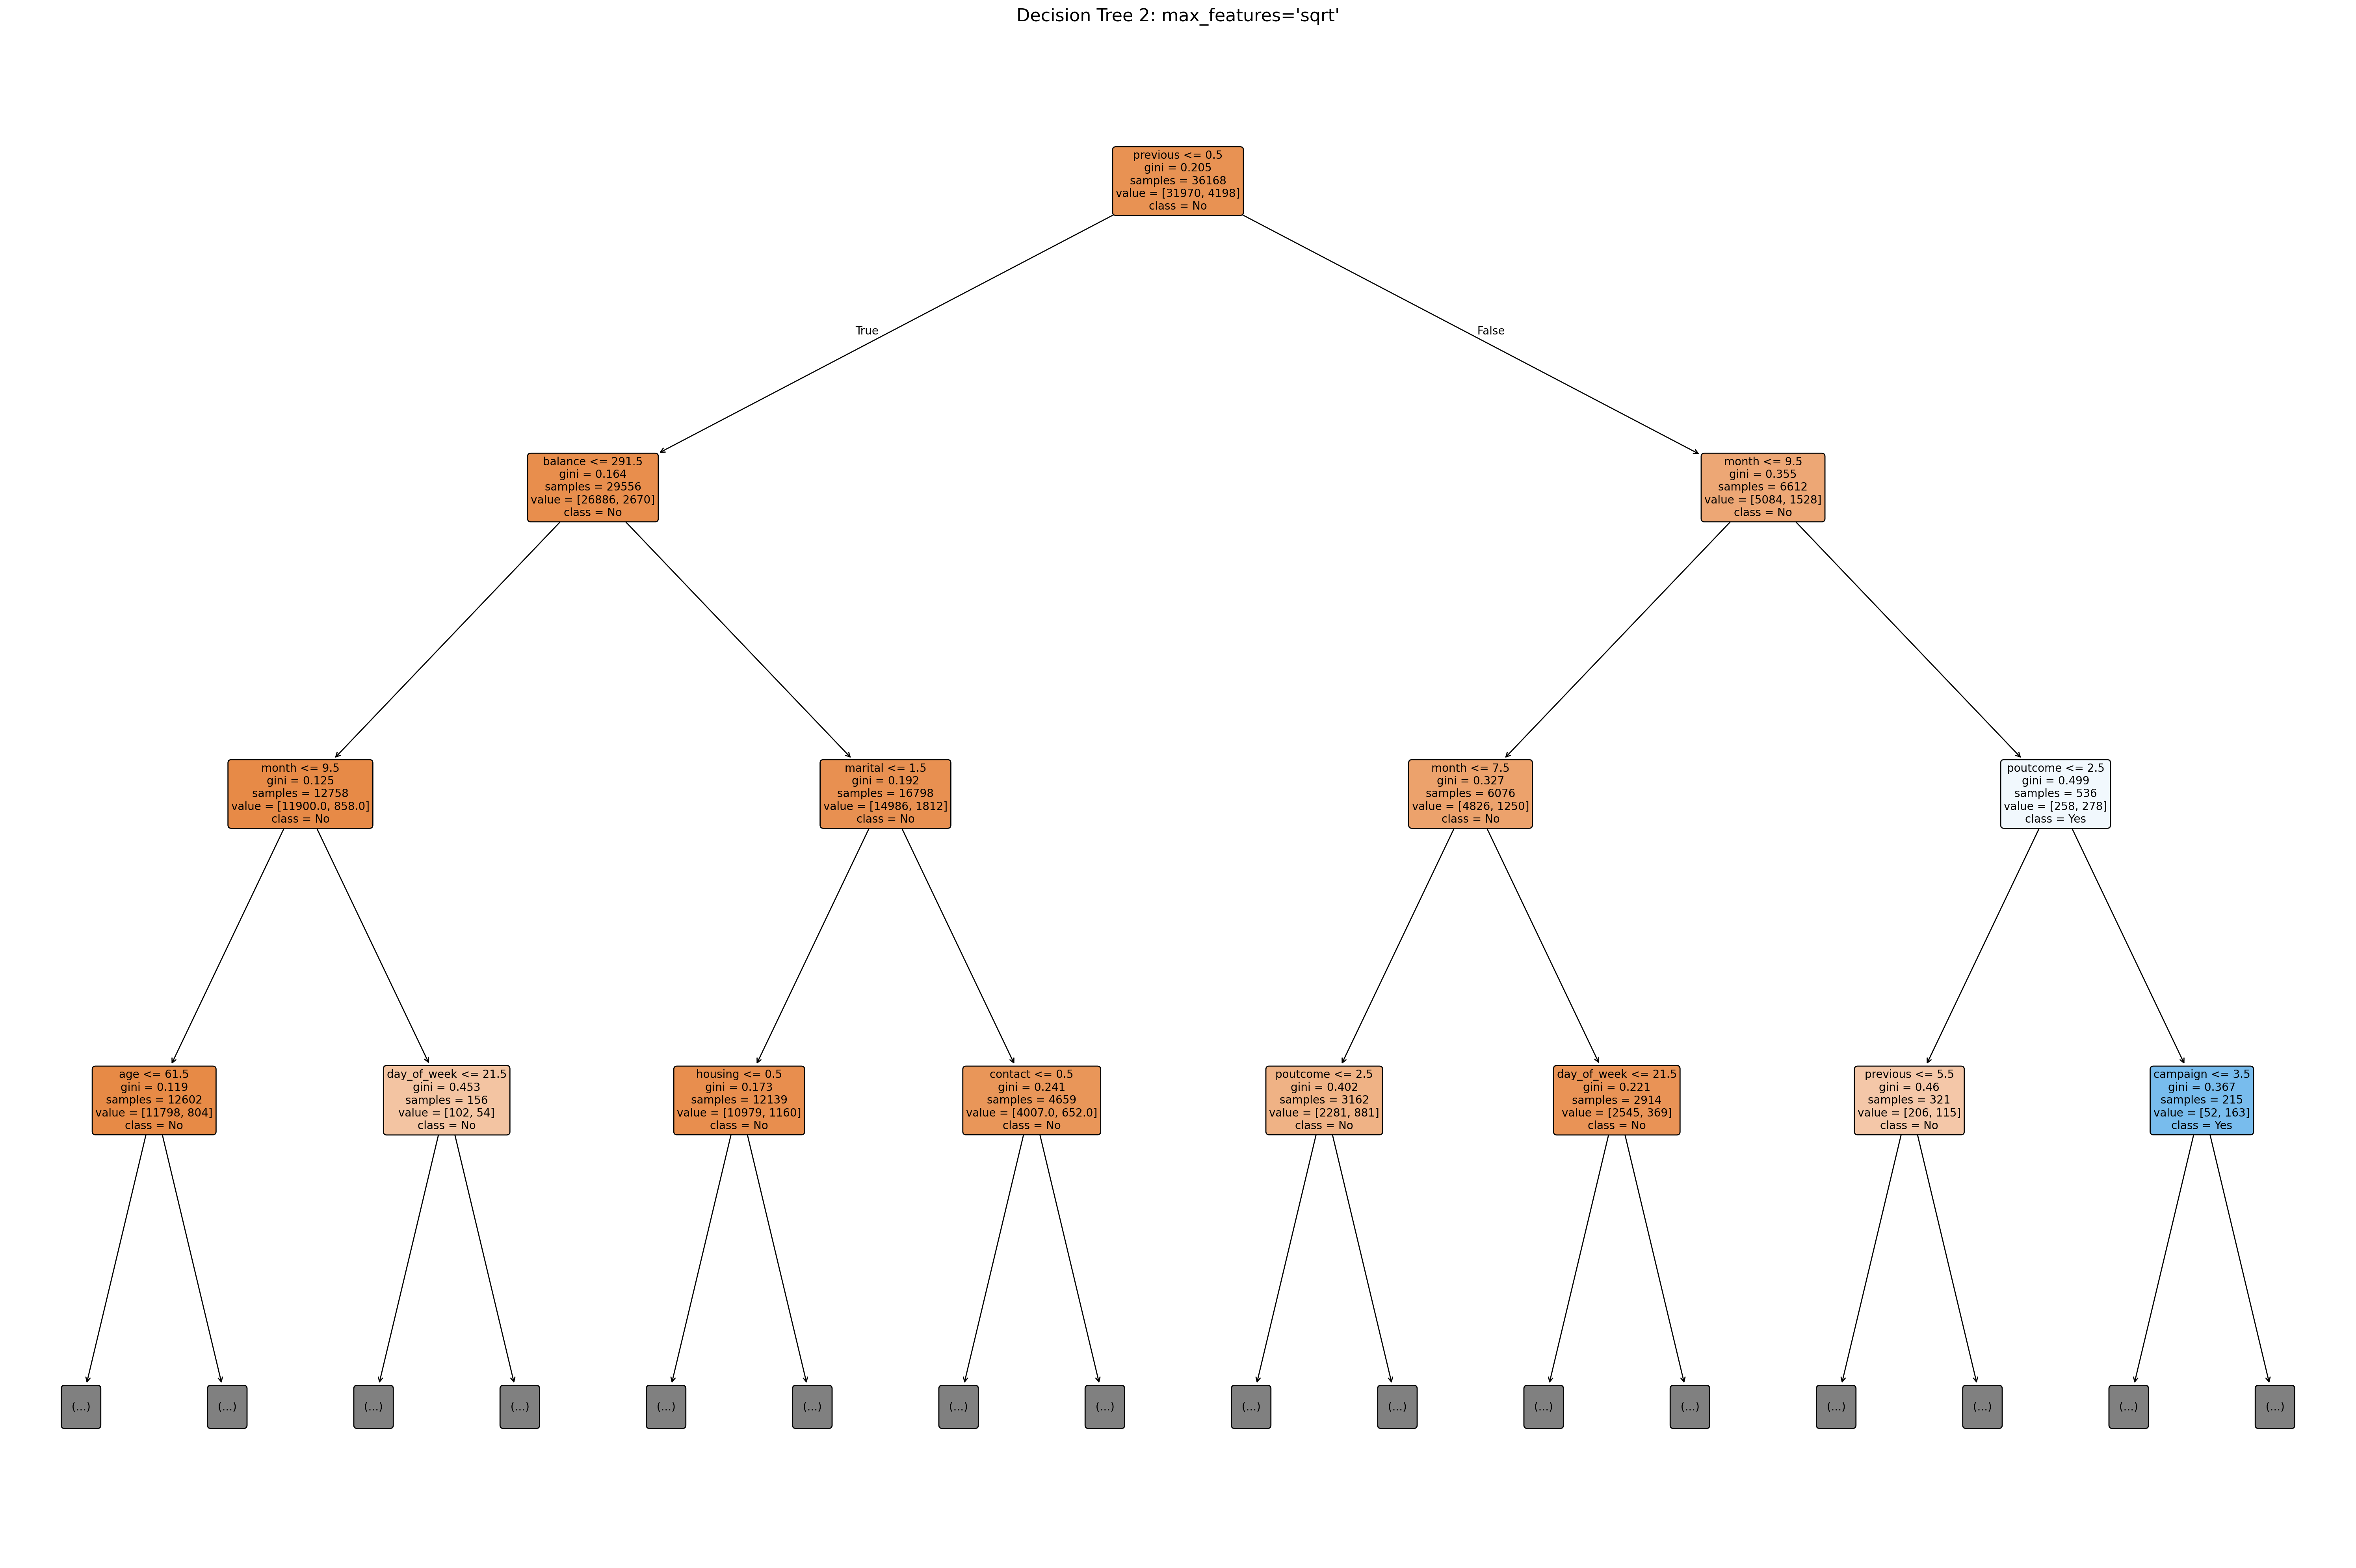

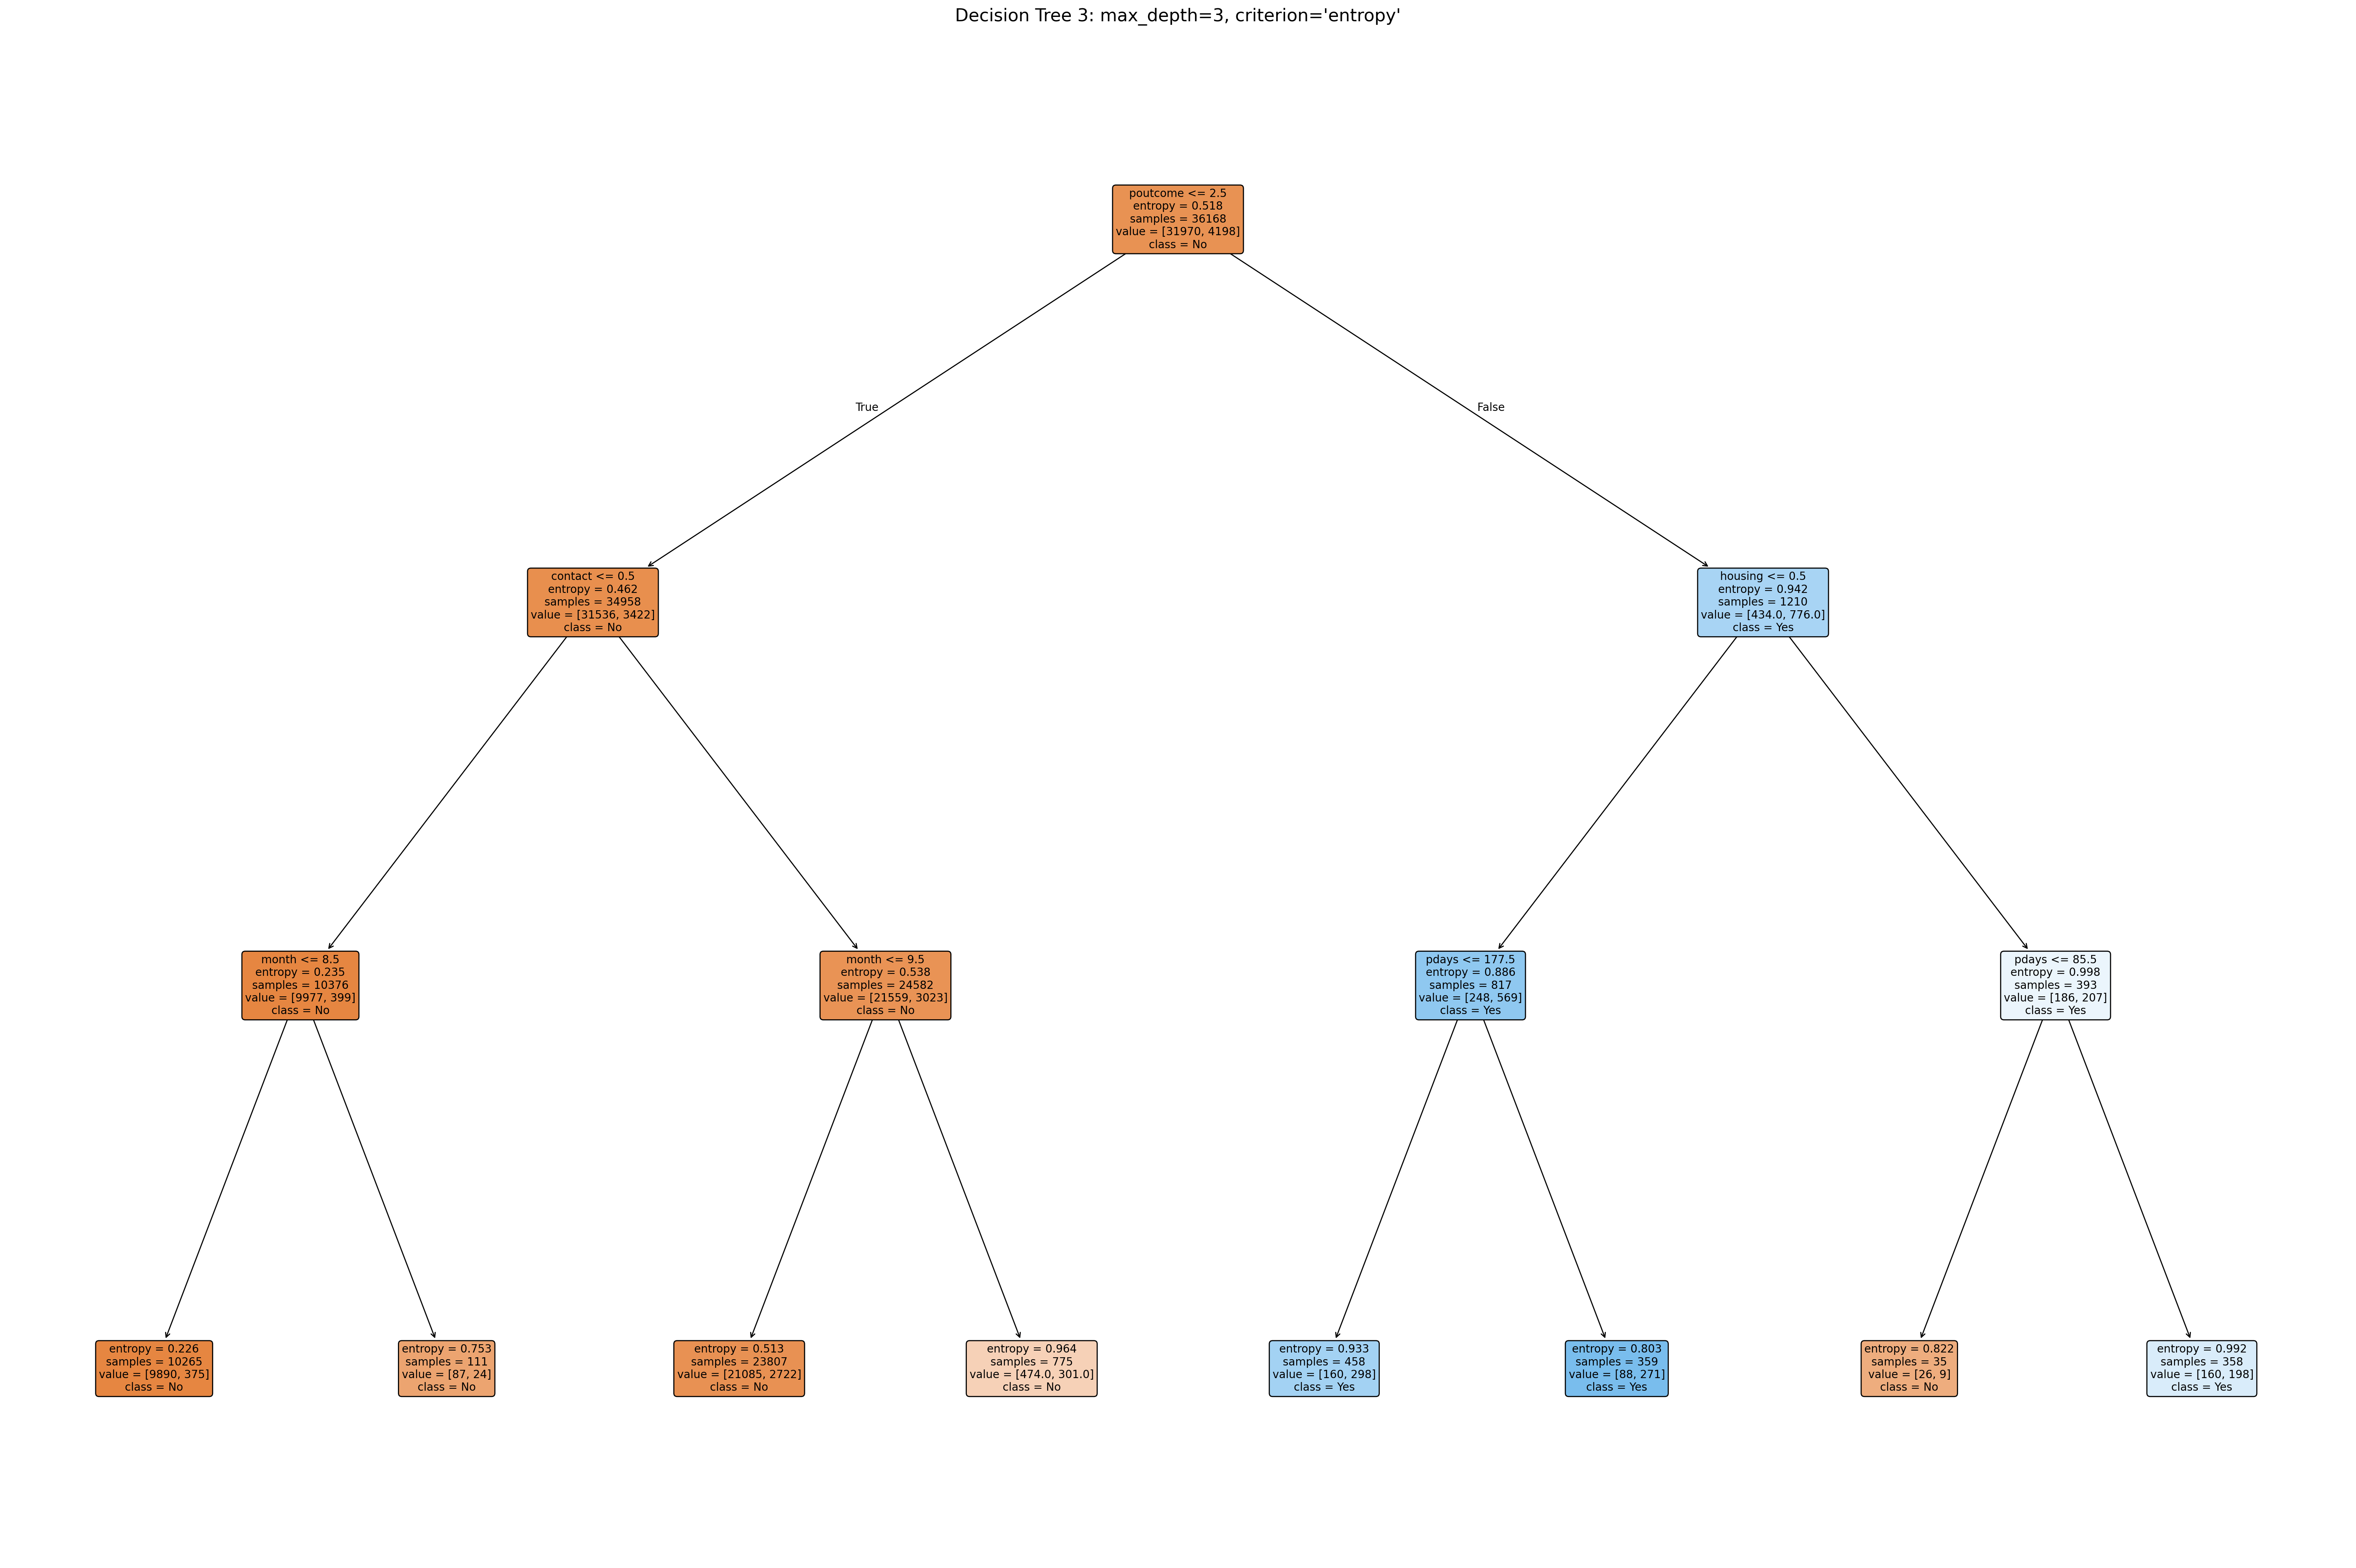

In [6]:
def plot_decision_tree(model, title, filename, feature_names, class_names, depth=None):
    fig, ax = plt.subplots(figsize=(30, 20), dpi=200)  # Larger size & higher resolution
    plot_tree(
        model,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        max_depth=depth,
        rounded=True,
        fontsize=10,
        ax=ax
    )
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Call the function for each tree
plot_decision_tree(dt1, "Decision Tree 1: Default", "decision_tree_1.png", X_train.columns, ["No", "Yes"], depth=3)
plot_decision_tree(dt2, "Decision Tree 2: max_features='sqrt'", "decision_tree_2.png", X_train.columns, ["No", "Yes"], depth=3)
plot_decision_tree(dt3, "Decision Tree 3: max_depth=3, criterion='entropy'", "decision_tree_3.png", X_train.columns, ["No", "Yes"])

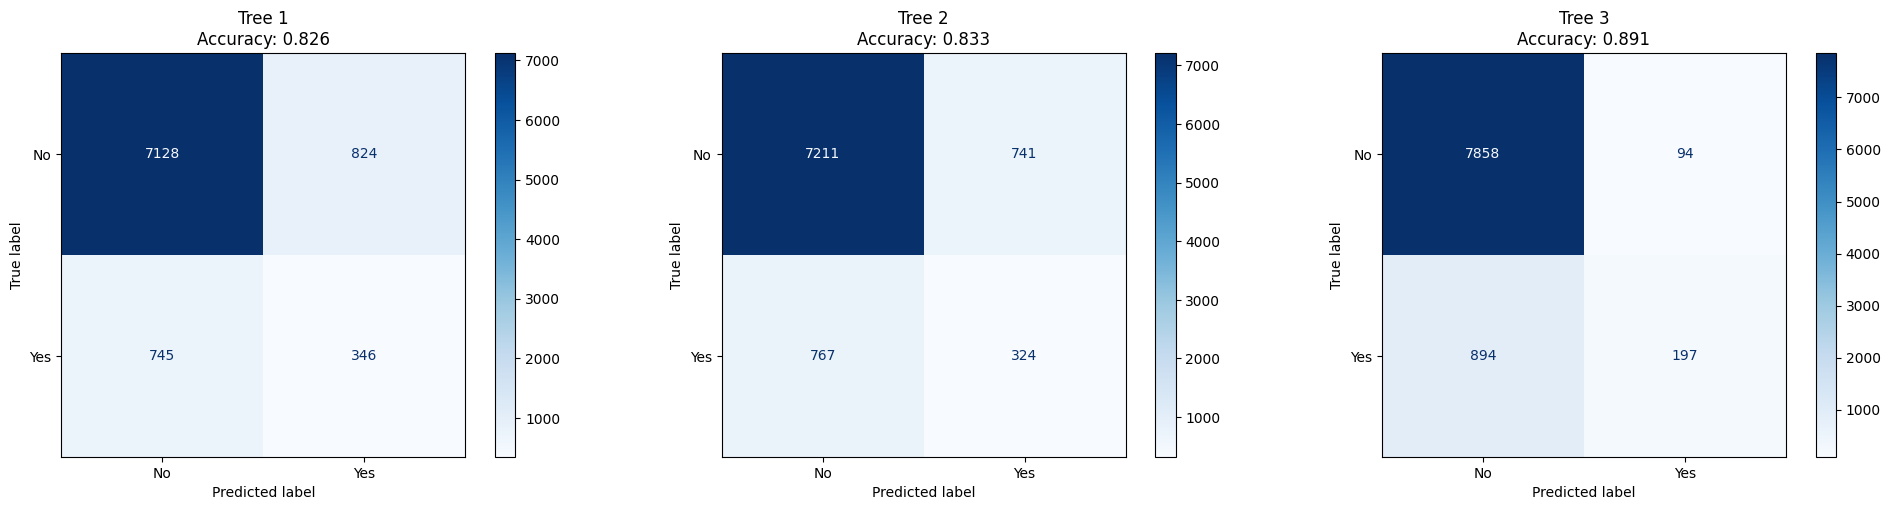

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Predictions
y_pred1 = dt1.predict(X_test)
y_pred2 = dt2.predict(X_test)
y_pred3 = dt3.predict(X_test)

# Accuracy scores
acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_test, y_pred2)
acc3 = accuracy_score(y_test, y_pred3)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred1, display_labels=["No", "Yes"], cmap='Blues', ax=axes[0])
axes[0].set_title(f"Tree 1\nAccuracy: {acc1:.3f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred2, display_labels=["No", "Yes"], cmap='Blues', ax=axes[1])
axes[1].set_title(f"Tree 2\nAccuracy: {acc2:.3f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred3, display_labels=["No", "Yes"], cmap='Blues', ax=axes[2])
axes[2].set_title(f"Tree 3\nAccuracy: {acc3:.3f}")

plt.tight_layout()
plt.show()

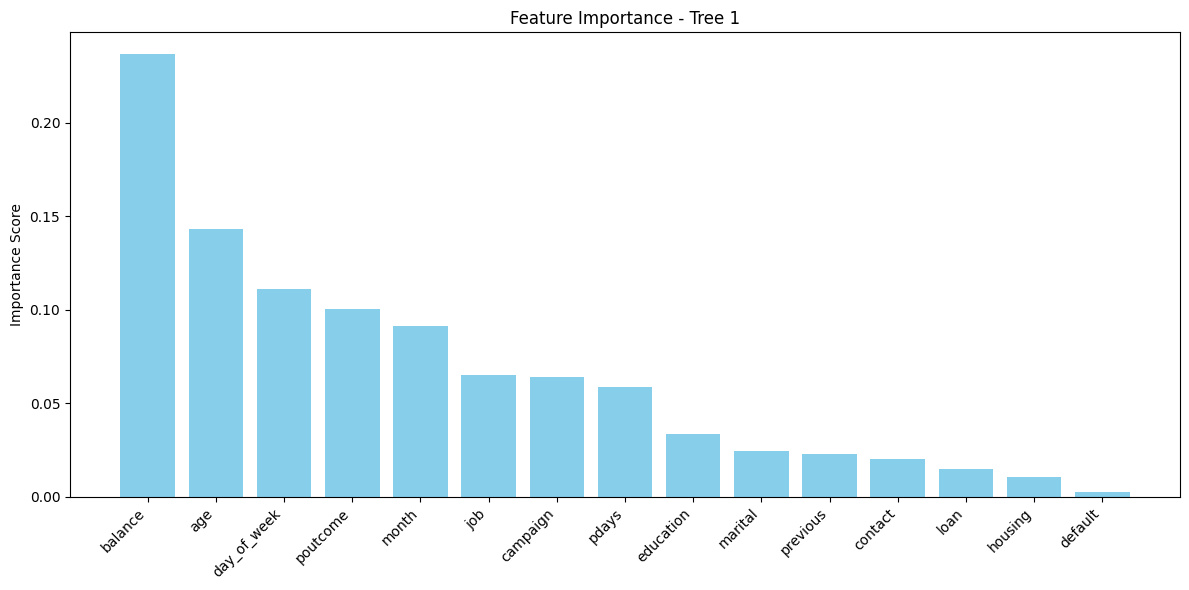

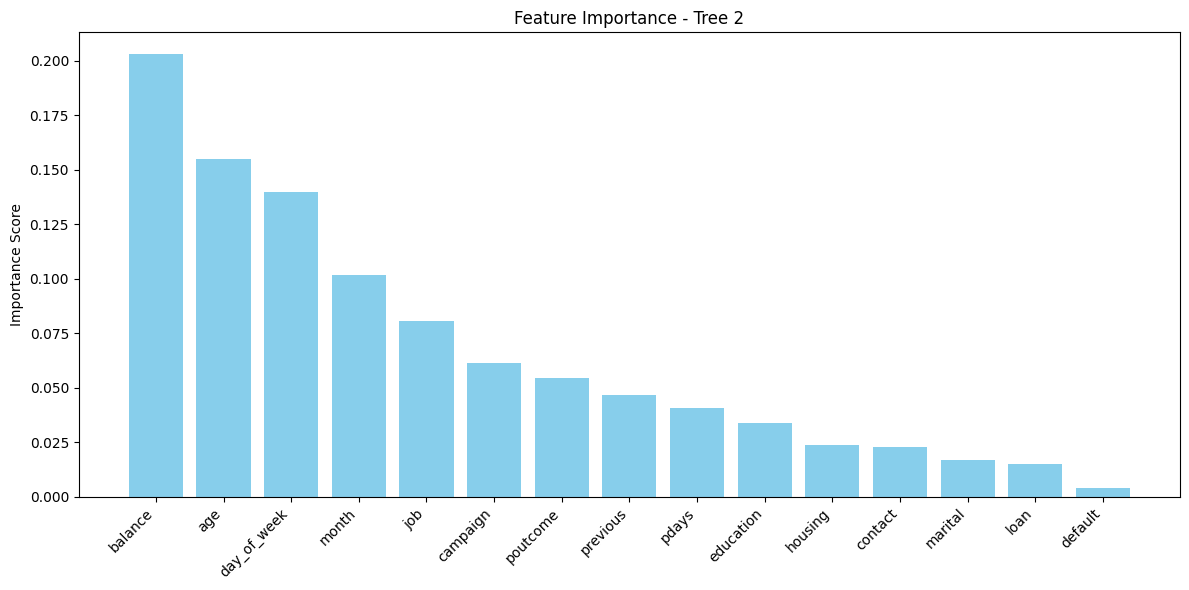

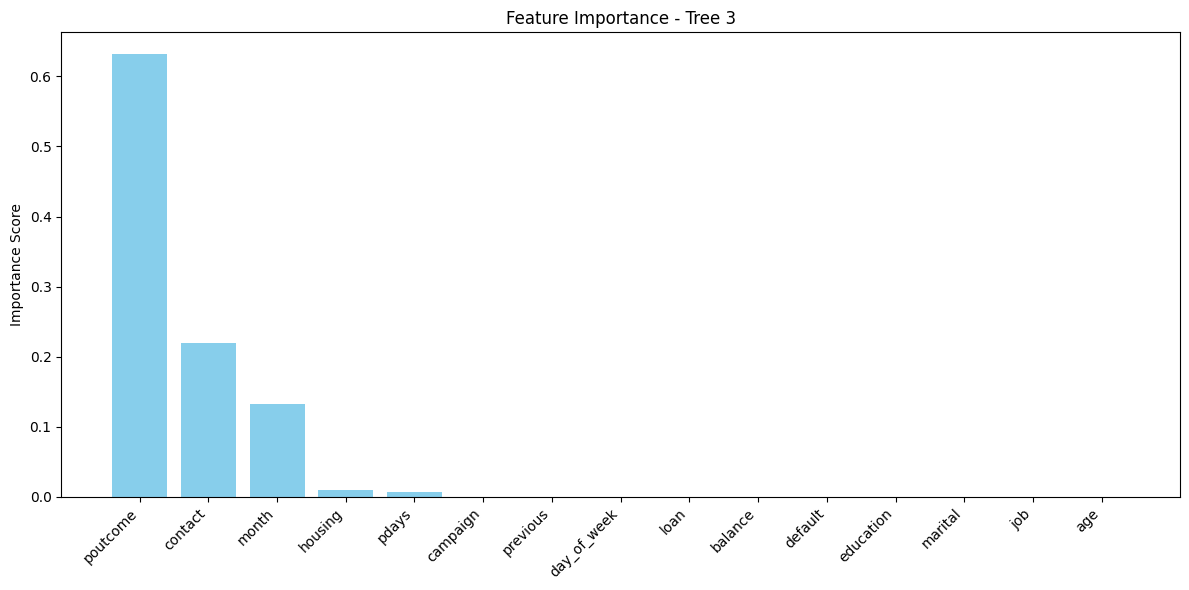

In [8]:
import numpy as np

def plot_feature_importance(model, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = X_train.columns[indices]

    plt.figure(figsize=(12, 6))
    plt.bar(features, importances[indices], color="skyblue")
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Importance Score")
    plt.tight_layout()
    plt.show()

plot_feature_importance(dt1, "Feature Importance - Tree 1")
plot_feature_importance(dt2, "Feature Importance - Tree 2")
plot_feature_importance(dt3, "Feature Importance - Tree 3")

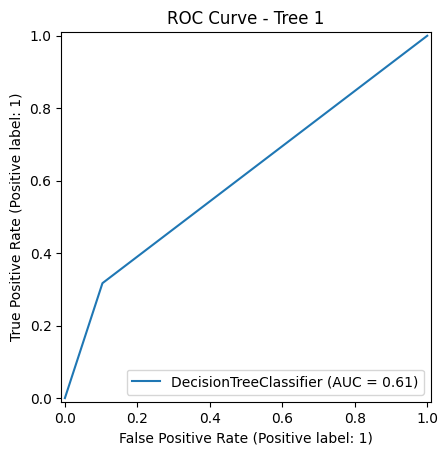

In [9]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dt1, X_test, y_test)
plt.title("ROC Curve - Tree 1")
plt.show()

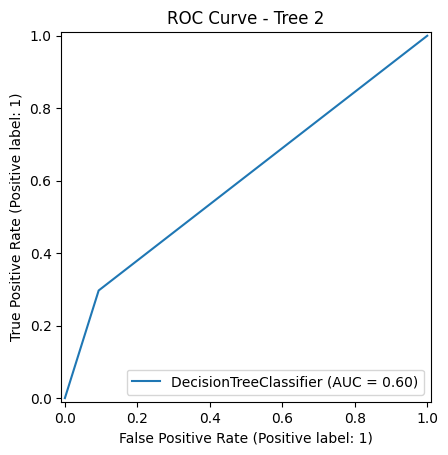

In [10]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dt2, X_test, y_test)
plt.title("ROC Curve - Tree 2")
plt.show()

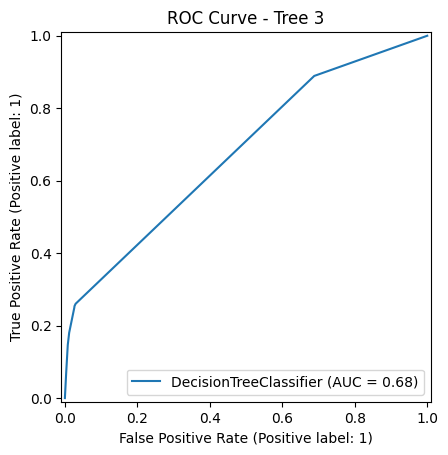

In [11]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dt3, X_test, y_test)
plt.title("ROC Curve - Tree 3")
plt.show()

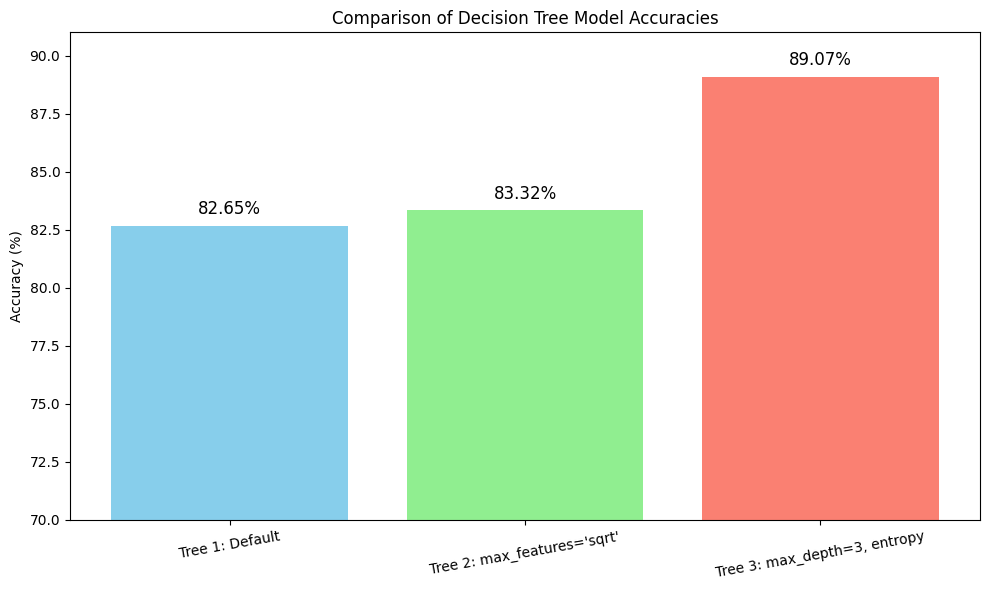

In [12]:
# Accuracy values for first three models
model_names = ['Tree 1: Default', "Tree 2: max_features='sqrt'", "Tree 3: max_depth=3, entropy"]
accuracies = [acc1, acc2, acc3]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, [a * 100 for a in accuracies], color=['skyblue', 'lightgreen', 'salmon'])

# Annotate each bar with accuracy value
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f"{acc * 100:.2f}%", ha='center', fontsize=12)

plt.ylim(70, 91)
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Decision Tree Model Accuracies")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()